Found 3010 images belonging to 10 classes.
Found 410 images belonging to 10 classes.


C:\Users\shubh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


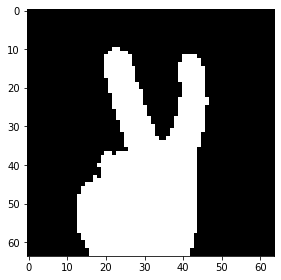

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


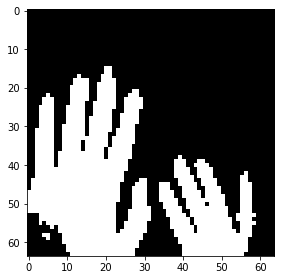

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


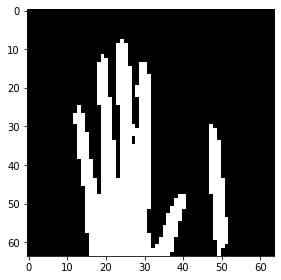

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


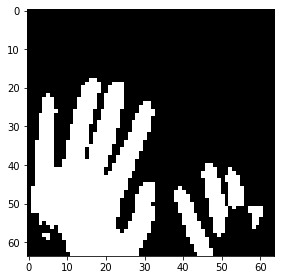

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


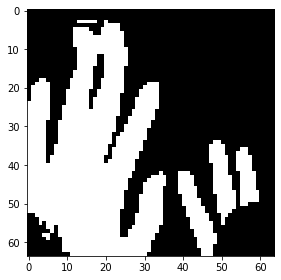

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


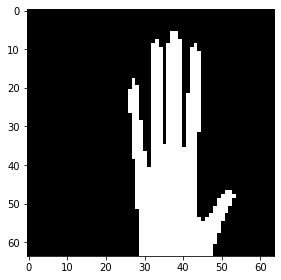

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


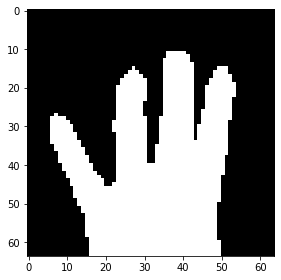

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


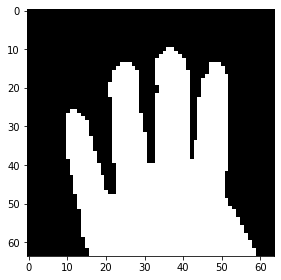

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


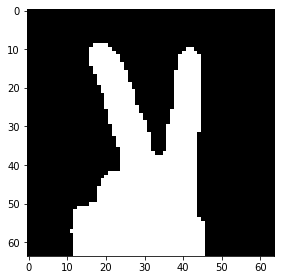

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


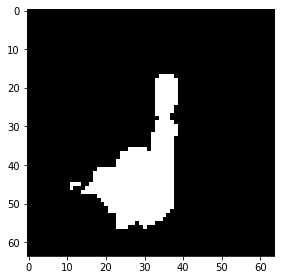

Epoch 1/10
301/301 - 173s - loss: 1.0952 - accuracy: 0.7439 - val_loss: 4.5358 - val_accuracy: 0.1829
Epoch 2/10
301/301 - 18s - loss: 0.1170 - accuracy: 0.9568 - val_loss: 5.3665 - val_accuracy: 0.1951
Epoch 3/10


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import warnings
import numpy as np
import cv2 as cv
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping, ModelCheckpoint
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import matplotlib.pyplot as plt

train_path = r'C:\Users\shubh\sign language detection\train'
test_path = r'C:\Users\shubh\sign language detection\test'

train_batches = ImageDataGenerator(tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = train_path, target_size = (64,64), class_mode = 'categorical', batch_size = 10, shuffle = True)
test_batches = ImageDataGenerator(tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = test_path, target_size = (64,64), class_mode = 'categorical', batch_size = 10, shuffle = True)

imgs, label = next(train_batches)

def plotImages(img_arr):
    
#     fig, ax = plt.subplot(1, 10, 1)
#     ax.flatten()
    
#     for img, pos in zip(img_arr, ax):
#         pos.imshow(img)
#         pos.axis('off')
    
    for i in img_arr:
        plt.imshow(i)
        plt.tight_layout()
        plt.show()
    
#     plt.tight_layout()
#     plt.show()

plotImages(imgs)

model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (64,64,3)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(128, activation = 'relu'),
    Dropout(0.3),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = SGD(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, min_lr = 0.0005)
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 2, verbose = 0, mode = 'auto')

model.fit(train_batches, epochs = 10, verbose = 2, callbacks = [reduce_lr, early_stopping], validation_data = test_batches)

curr_batch, label = next(train_batches)

score = model.evaluate(curr_batch, label, verbose = 0)

print(f'{score[0]} and then {score[1]}')

model.save("sign_language.h5")

word_dict = {0:'One',1:'Ten',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'}
prediction = model.predict(curr_batch, verbose = 0)

print("predictions ")

for i in prediction:
    print(i.argmax())
    
print("correct ", label)

#argmax returns indices of max element in an array along a particular axis..
#axis = 0 vertical ....axis = 1 horizontal x axis..